<a href="https://colab.research.google.com/github/EmamulHossen/Decision_tree_Classifier/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Required Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

**Load the dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/game data.csv")

In [ ]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [ ]:
df.drop("Days",axis=1,inplace=True)

In [ ]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


**Separate feature & Label column**

In [ ]:
x=df.drop("Wear Jacket?",axis=1)

In [ ]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [ ]:
y=df["Wear Jacket?"]

In [ ]:
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

# **Use LabelEncoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Creating Object
l_encoder=LabelEncoder()

In [ ]:
from pandas.api.types import is_numeric_dtype

In [ ]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col] = l_encoder.fit_transform(x[col])

In [ ]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Creating Object
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(x,y)

DecisionTreeClassifier()

In [ ]:
prediction=clf.predict([[1,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
prediction

array(['Yes'], dtype=object)

In [ ]:
prediction_1=clf.predict([[0,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
prediction_1

array(['No'], dtype=object)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = y[0]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = y[1]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = y[1]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = y[0]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = y[0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y[1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = y[0]')]

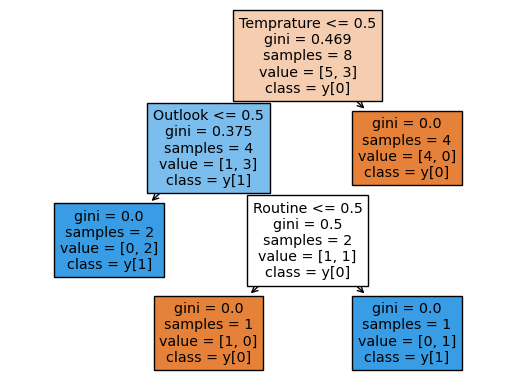

In [ ]:
#Draw tree
tree.plot_tree(clf,feature_names=x.columns,class_names=True,filled=True)